Drop the DAW – Sound Design in Python - Isaac Roberts - ADC20  
https://www.youtube.com/watch?v=Q40qEg8Yq5c&t=1323s  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio

In [79]:
class Sig:
    def __init__(self, sec=1, const=0.0, array=None):
        self.sr = 44100
        self.sec = sec
        if array is None:
            self.array = np.full(int(self.sr * sec), const, dtype=float)
        else:
            self.array = np.copy(array)
            
    def plot(self, start_sec=0, end_sec=None):
        if end_sec is None:
            end_sec = self.sec
        n1 = int(self.sr * start_sec)
        n2 = int(self.sr * end_sec)
        a = self.array[n1:n2]
        
        plt.plot(a)
        
    def play(self, start_sec=0, end_sec=None):
        if end_sec is None:
            end_sec = self.sec
        n1 = int(self.sr * start_sec)
        n2 = int(self.sr * end_sec)
        a = self.array[n1:n2]
        
        return Audio(a, rate=self.sr, autoplay=True, normalize=False)

    def const(self, c):
        sig = Sig(self.sec, const=c)
        return sig
    
    def __add__(self, sig):
        a = self.array + sig.array
        return Sig(array=a)
    
    def __mul__(self, sig):
        a = self.array * sig.array
        return Sig(array=a)
    
    def mul(self, factor):
        a = np.copy(self.array)
        a = a * factor
        return Sig(array=a)
    
    def range(self, min, max):
        x0 = np.min(self.array)
        x1 = np.max(self.array)
        m = (max - min) / (x1 -x0)
        n = min - m * x0
        a = np.copy(self.array)
        a = m * a + n
        return Sig(array=a)
    
    def integrate(self):
        a = np.copy(self.array)
        a = a / self.sr
        a = np.cumsum(a)
        return Sig(array=a)
        
    def sin(self):
        s = self.integrate().array
        a = np.sin(2 * np.pi * s)
        return Sig(array=a)
        
    def saw(self):
        s = self.integrate().array
        a = ((2 * s) % 2) - 1
        return Sig(array=a)
    
    def rect(self):
        s = self.integrate().array
        a = np.where( 2 * s % 2 > 1, -1, 1)
        return Sig(array=a)

    def tri(self):
        s = self.integrate().array
        a = np.abs((1 * s - 0.5) % 2 -1) * 2 -1
        return Sig(array=a)
    
    def asr(self, atk, sus, rel):
        atk_ar = np.linspace(0, 1, int(self.sr * atk))
        sus_ar = np.linspace(1, 1, int(self.sr * sus))
        rel_ar = np.linspace(1, 0, int(self.sr * rel))
        
        env = atk_ar
        env = np.append(env, sus_ar)
        env = np.append(env, rel_ar)
        
        if len(env) > len(self.array):
            env = env[0:len(self.array)]
            
        if len(env) < len(self.array):
            n = len(self.array) -len(env)
            env = np.append(env, np.zeros(n))

        a = self.array * env
        return Sig(array=a)
        

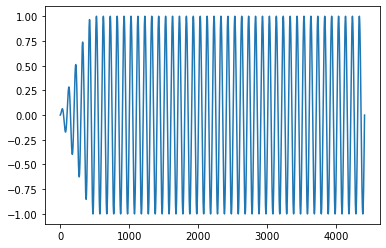

In [82]:
Sig(sec=1).const(440).sin().asr(0.01, 0.5, 0.5-0.01).plot(0, 0.1)

In [13]:
s1 = Sig(sec=3).const(2).saw().range(800, 400).sin().mul(0.6)
s2 = Sig(sec=3).const(200).saw().mul(0.2)
s3 = Sig(sec=3).const(1).sin().range(0, 1)
s = (s1 + s2) * s3
s.play()  # that's really cool!

In [18]:
a = np.arange(0,3, 1)


array([0, 1, 2])